In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

# Importing Data

In [2]:
data = pd.read_csv('../input/bigbasket-entire-product-list-28k-datapoints/BigBasket Products.csv',index_col=0)

In [3]:
data.head(10)

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.0,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...
7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.0,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.0,250.0,Hand Wash & Sanitizers,4.0,70%Alcohol based is gentle of hand leaves skin...
9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.0,1098.0,Shampoo & Conditioner,3.5,"An exclusive blend with Vitamin B7 Biotin, Hyd..."


# Basic Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27555 entries, 1 to 27555
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product       27554 non-null  object 
 1   category      27555 non-null  object 
 2   sub_category  27555 non-null  object 
 3   brand         27554 non-null  object 
 4   sale_price    27555 non-null  float64
 5   market_price  27555 non-null  float64
 6   type          27555 non-null  object 
 7   rating        18929 non-null  float64
 8   description   27440 non-null  object 
dtypes: float64(3), object(6)
memory usage: 2.1+ MB


In [5]:
data.columns

Index(['product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description'],
      dtype='object')

In [6]:
data.shape

(27555, 9)

In [7]:
data.nunique()

product         23540
category           11
sub_category       90
brand            2313
sale_price       3256
market_price     1348
type              426
rating             40
description     21944
dtype: int64

In [8]:
list(data.category.unique())

['Beauty & Hygiene',
 'Kitchen, Garden & Pets',
 'Cleaning & Household',
 'Gourmet & World Food',
 'Foodgrains, Oil & Masala',
 'Snacks & Branded Foods',
 'Beverages',
 'Bakery, Cakes & Dairy',
 'Baby Care',
 'Fruits & Vegetables',
 'Eggs, Meat & Fish']

In [9]:
data.sub_category.unique()

array(['Hair Care', 'Storage & Accessories', 'Pooja Needs',
       'Bins & Bathroom Ware', 'Bath & Hand Wash', 'All Purpose Cleaners',
       'Skin Care', 'Mops, Brushes & Scrubs', 'Cooking & Baking Needs',
       'Chocolates & Biscuits', 'Fresheners & Repellents',
       'Snacks, Dry Fruits, Nuts', 'Dairy & Cheese',
       'Pasta, Soup & Noodles', 'Dry Fruits', 'Drinks & Beverages',
       'Kitchen Accessories', 'Flask & Casserole', 'Breakfast Cereals',
       'Frozen Veggies & Snacks', 'Fruit Juices & Drinks',
       'Cookies, Rusk & Khari', 'Fragrances & Deos', 'Tea',
       'Masalas & Spices', "Men's Grooming", 'Chocolates & Candies',
       'Steel Utensils', 'Tinned & Processed Food', 'Organic Staples',
       'Sauces, Spreads & Dips', 'Pickles & Chutney',
       'Ready To Cook & Eat', 'Baby Bath & Hygiene', 'Stationery',
       'Pet Food & Accessories', 'Biscuits & Cookies', 'Oral Care',
       'Snacks & Namkeen', 'Detergents & Dishwash', 'Crockery & Cutlery',
       'Cuts & Spro

In [10]:
data.isna().sum()

product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [11]:
data.brand.value_counts()

Fresho              638
bb Royal            539
BB Home             428
DP                  250
Fresho Signature    171
                   ... 
Wellastrate           1
Clean & Fresh         1
Lal                   1
Glint                 1
Baron De Bercy        1
Name: brand, Length: 2313, dtype: int64

In [12]:
data.duplicated().sum()

354

In [13]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [14]:
count_prod = data.groupby(['category','sub_category']).product.count().to_frame('Total_Prods')
count_prod

Total_Prods
category               sub_category                          
Baby Care              Atta, Flours & Sooji                 1
                       Baby Accessories                    37
                       Baby Bath & Hygiene                206
                       Baby Food & Formula                 47
                       Diapers & Wipes                    247
...                                                       ...
Snacks & Branded Foods Noodle, Pasta, Vermicelli          122
                       Pickles & Chutney                  162
                       Ready To Cook & Eat                640
                       Snacks & Namkeen                   500
                       Spreads, Sauces, Ketchup           305

[99 rows x 1 columns]

In [15]:
count_type = data.groupby(['category','sub_category']).type.count().to_frame('Total_Type')
count_type

Total_Type
category               sub_category                         
Baby Care              Atta, Flours & Sooji                1
                       Baby Accessories                   37
                       Baby Bath & Hygiene               206
                       Baby Food & Formula                47
                       Diapers & Wipes                   247
...                                                      ...
Snacks & Branded Foods Noodle, Pasta, Vermicelli         122
                       Pickles & Chutney                 162
                       Ready To Cook & Eat               640
                       Snacks & Namkeen                  500
                       Spreads, Sauces, Ketchup          305

[99 rows x 1 columns]

In [16]:
price_data = data[['product','brand','type','sale_price']]
price_data.head()

,product,brand,type,sale_price
index,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Sri Sri Ayurveda,Hair Oil & Serum,220.0
2,Water Bottle - Orange,Mastercook,Water & Fridge Bottles,180.0
3,"Brass Angle Deep - Plain, No.2",Trm,Lamp & Lamp Oil,119.0
4,Cereal Flip Lid Container/Storage Jar - Assort...,Nakoda,"Laundry, Storage Baskets",149.0
5,Creme Soft Soap - For Hands & Body,Nivea,Bathing Bars & Soaps,162.0


# Products with highest price

In [17]:
highest = price_data.sort_values('sale_price',ascending=False)[:10]
highest

,product,brand,type,sale_price
index,,,,
25302,Bravura Clipper,Wahl,Pet Cleaning & Grooming,12500.00
21762,Pet Food - N&D Team Breeder Puppy Top Farmina,Farmina,Pet Meals & Treats,10090.00
12670,Epilator SE9-9961 Legs-Body-Face,Braun,Hair Removal,8184.44
23083,"Gas Stove-4 Burner Royale Plus Schott Glass, B...",Prestige,Gas Stove,7999.00
2782,Extra Virgin Olive Oil,Abbies,Extra Virgin Olive Oil,7299.00
25798,"4 Burner Gas Stove - Marvel Plus Glass Tables,...",Prestige,Gas Stove,7270.00
1057,"Gas Stove-3 Burner Royale Plus Schott Glass, B...",Prestige,Gas Stove,6999.00
6035,Whey Protein Powder,BTN Sports,Supplements & Proteins,6700.00
1767,Good Girl Eau De Parfum For Women,Carolina Herrera,Eau De Parfum,6660.00


# Products with lowest price

In [18]:
lowest = price_data.sort_values('sale_price')[:10]
lowest

,product,brand,type,sale_price
index,,,,
26977,Curry Leaves,Fresho,Indian & Exotic Herbs,2.45
21313,Serum,Livon,Hair Oil & Serum,3.00
15927,Dreams Cup Cake - Choco,Elite,Muffins & Cup Cakes,5.00
22179,Tiger Elaichi Cream Biscuits,Britannia,Glucose & Milk Biscuits,5.00
19203,Bounce Biscuits - Choco Creme,Sunfeast,Cream Biscuits & Wafers,5.00
27491,50-50 Timepass Salted Biscuits,Britannia,Salted Biscuits,5.00
9972,"Tomato - Local, Organically Grown",Fresho,Organic Vegetables,5.00
26585,Polo - The Mint With The Hole,Nestle,"Toffee, Candy & Lollypop",5.00
19539,Layer Cake - Chocolate,Winkies,Tea Cakes & Slice Cakes,5.00


# Top Rated Products

In [19]:
top_rate = data[data.rating>=4.5]
top_rate = top_rate.sort_values('rating',ascending=False)
top_rate[['product','brand','rating']]

,product,brand,rating
index,,,
13,"Face Wash - Oil Control, Active",Oxy,5.0
14485,Charcoal Body Wash For Men - Sage & Patchouli,Spruce Shave Club,5.0
14730,Extra Moisturizing Baby Soap,Himalaya,5.0
14717,Honey - Pure Bee,Hintz,5.0
14707,Chocolate Flavour Sattuz,Sattuz,5.0
...,...,...,...
4278,Wafers - Strawberry Cream,Nutro,4.5
17783,Charcoal Face Scrub With Black Sand - Exfoliat...,Bombay Shaving Company,4.5
17812,Manicure Set In Case,Vauva,4.5


# Lowest Rated Products

In [20]:
low_rate = data[data.rating<=2]
low_rate = low_rate.sort_values('rating')
low_rate[['product','brand','rating']]

,product,brand,rating
index,,,
27519,Gluten-Free Vegetable Millet Khichdi Mix,Graminway,1.0
10454,Milk Chocolate - Salted Peanut Praline,Uns,1.0
18660,Coco Chocolate,Diamond,1.0
18781,"Diwali Gift - Cane Delight, Large",Smoor,1.0
10278,Copper Glass Tumbler - Hammered,Mr.Copper King,1.0
...,...,...,...
8827,My Story For Him - Perfumed Deodorant Natural ...,Embark,2.0
19947,Organic Eco-Friendly No Rinse Floor Cleaner,Kolan,2.0
8742,Syrup - Caramel,Mrs Bector'S Cremica,2.0


# Products with most discount

In [21]:
discount_data = data.copy()
discount_data.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [22]:
discount_data['Discount_Percentage']=round(((discount_data['market_price']-discount_data['sale_price'])/discount_data['market_price'])*100,2)
discount_data.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description,Discount_Percentage
index,,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,0.00
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",0.00
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",52.40
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,15.34
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,0.00


In [23]:
top_discount = discount_data[['product','brand','Discount_Percentage']].sort_values('Discount_Percentage',ascending=False)[:10]
top_discount

,product,brand,Discount_Percentage
index,,,
26977,Curry Leaves,Fresho,83.67
17714,Fruit & Vegetables Hand Juicer,Triones,82.51
13319,Small Silicone Spatula With Plastic Handle - A...,HAZEL,81.20
13741,Decorative Party Light Big Star String LED Lig...,Lexton,80.98
10439,NHS 860 Temperature Control Professional Hair ...,Nova,80.50
4563,Concealer Brush 930,Mud,80.00
13266,Decorative Party Light Golden Bell String LED ...,Lexton,79.24
11474,Decorative Party Light Golden Bell String LED ...,Lexton,79.24
10093,USB String Fairy Lights 3M 30 LED For Decorati...,Mansaa,78.70


# Products with discount over 50%

In [24]:
above50 = discount_data[discount_data.Discount_Percentage>=50.0]
above50['product'].count()

737

# Products with discount below 5%

In [25]:
below5 = discount_data[discount_data.Discount_Percentage<=5.0]
below5['product'].count()

13771

# Visualizations:

## No. of Products Per Brand

In [26]:
brand_prod = data.brand.value_counts()
brand_prod

Fresho              638
bb Royal            539
BB Home             428
DP                  243
Fresho Signature    170
                   ... 
Pez                   1
Dolpin                1
Godrej Nupur          1
Coffee Day            1
Baron De Bercy        1
Name: brand, Length: 2313, dtype: int64

In [27]:
data_df = data.groupby('brand').size().reset_index().sort_values(0,ascending=False)
data_df.rename(columns={0:'count'},inplace=True)
data_df.head()

,brand,count
741,Fresho,638
2297,bb Royal,539
171,BB Home,428
502,DP,243
743,Fresho Signature,170


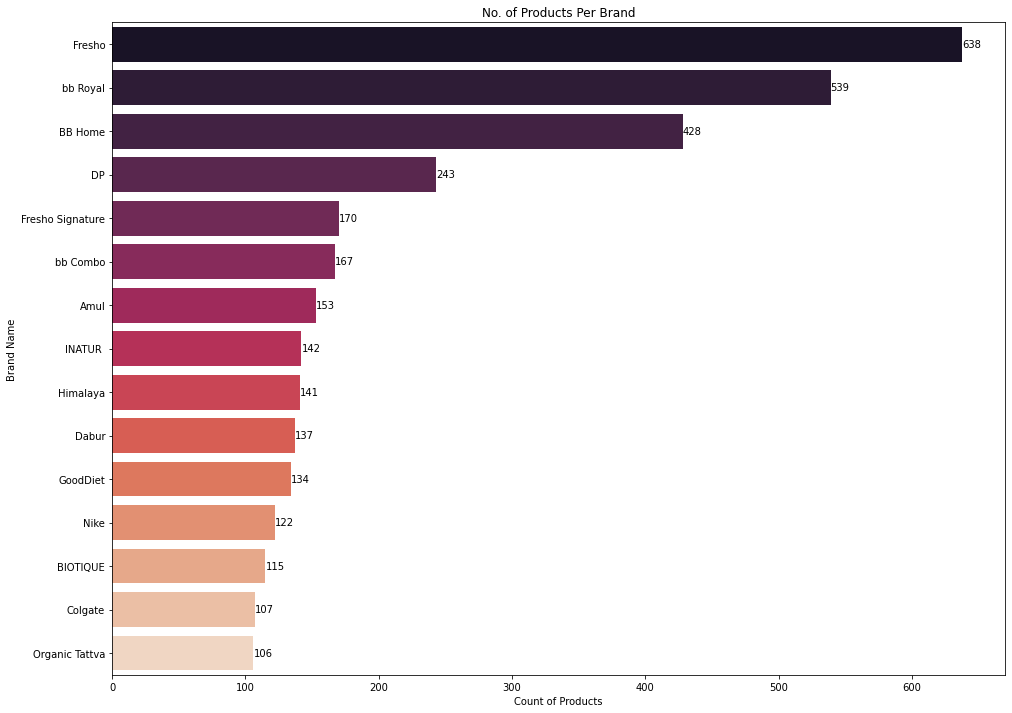

In [28]:
plt.figure(figsize=(16,12))
kl = sns.barplot(data=data_df[:15],x='count',y='brand',palette='rocket')
kl.bar_label(kl.containers[0])
plt.xlabel("Count of Products")
plt.ylabel('Brand Name')
plt.title('No. of Products Per Brand')
plt.show()

## No. of Products Per Category

In [29]:
category_data = data.groupby('category').size().reset_index().sort_values(0,ascending=False)
category_data.rename(columns={0:'count'},inplace=True)
category_data.head()

,category,count
2,Beauty & Hygiene,7683
8,Gourmet & World Food,4677
9,"Kitchen, Garden & Pets",3457
10,Snacks & Branded Foods,2810
6,"Foodgrains, Oil & Masala",2673


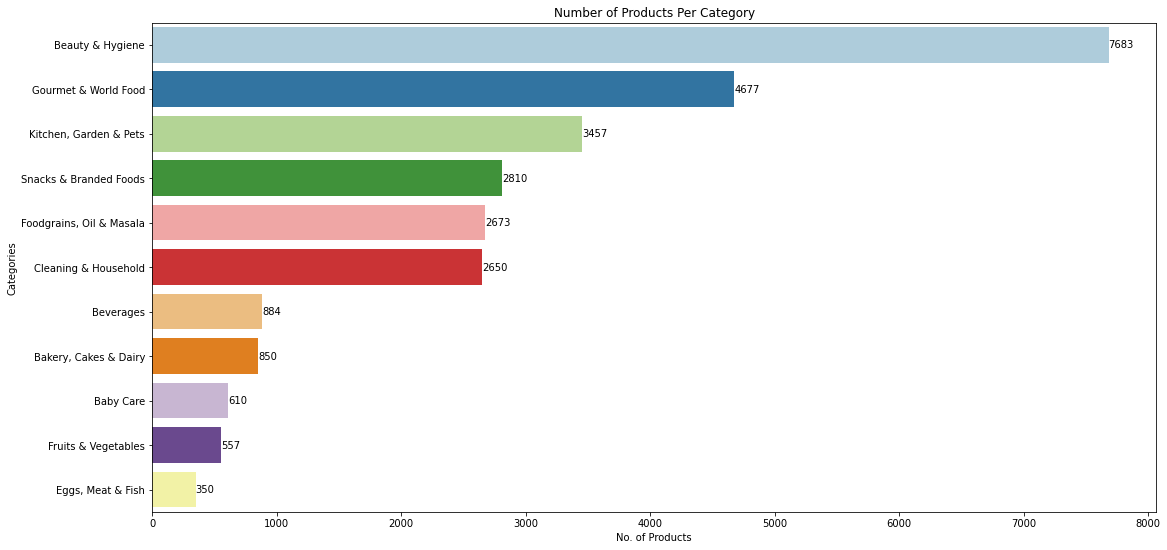

In [30]:
plt.figure(figsize=(18,9))
cd = sns.barplot(data=category_data,x='count',y='category',palette='Paired')
cd.bar_label(cd.containers[0])
plt.xlabel('No. of Products')
plt.ylabel('Categories')
plt.title("Number of Products Per Category")
plt.show()

In [31]:
cat = list(data.category.unique())
cat

['Beauty & Hygiene',
 'Kitchen, Garden & Pets',
 'Cleaning & Household',
 'Gourmet & World Food',
 'Foodgrains, Oil & Masala',
 'Snacks & Branded Foods',
 'Beverages',
 'Bakery, Cakes & Dairy',
 'Baby Care',
 'Fruits & Vegetables',
 'Eggs, Meat & Fish']

In [32]:
cat_subcat=count_prod.sort_values(['category','Total_Prods'],ascending=False).reset_index()
cat_subcat

,category,sub_category,Total_Prods
0,Snacks & Branded Foods,Ready To Cook & Eat,640
1,Snacks & Branded Foods,Snacks & Namkeen,500
2,Snacks & Branded Foods,Biscuits & Cookies,305
3,Snacks & Branded Foods,"Spreads, Sauces, Ketchup",305
4,Snacks & Branded Foods,Chocolates & Candies,273
...,...,...,...
94,Baby Care,Feeding & Nursing,48
95,Baby Care,Baby Food & Formula,47
96,Baby Care,Baby Accessories,37
97,Baby Care,Mothers & Maternity,24


## All Categories with sub-category product count

In [33]:
for i in cat:
    labels_subcat = cat_subcat[cat_subcat['category']==i].sub_category.tolist()
    values_subcat = cat_subcat[cat_subcat['category']==i].Total_Prods.tolist()
    plt.figure(figsize=(16,8))
    hui=px.pie(names=labels_subcat,values=values_subcat,hole=0.4,title=i)
    hui.show()

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

## No. of Products Per Rating

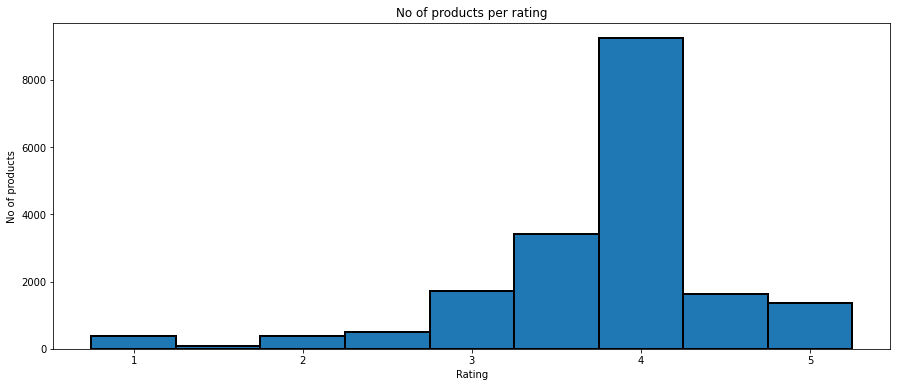

In [34]:
plt.figure(figsize=(15,6))
axi=plt.hist(data.rating,bins=np.arange(1,6,0.5),edgecolor="black",align='left',linewidth=2)
plt.xlabel("Rating")
plt.ylabel("No of products")
plt.title("No of products per rating")
plt.show()

## Sub-category box plot of Beauty & Hygiene with sale_price

In [35]:
BH_df = data[data['category']=='Beauty & Hygiene']
beauty_df = BH_df[['category','sub_category','sale_price']].sort_values('sale_price')
beauty_df.sample()

,category,sub_category,sale_price
index,,,
9774,Beauty & Hygiene,Skin Care,630.0


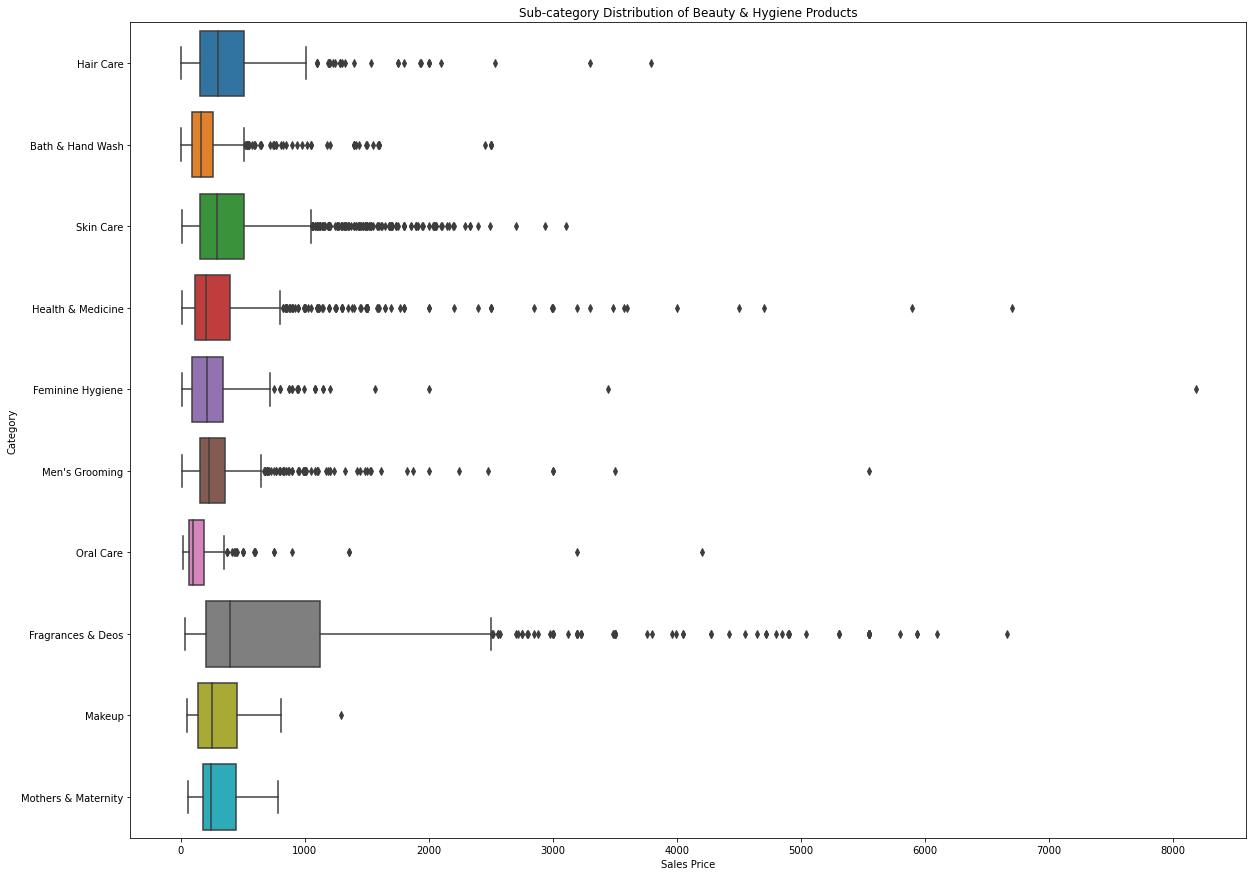

In [36]:
plt.figure(figsize=(20,15))
sns.boxplot(data=beauty_df,y='sub_category',x='sale_price')
plt.xlabel("Sales Price")
plt.ylabel("Category")
plt.title("Sub-category Distribution of Beauty & Hygiene Products")
plt.show()

## Average Discount Percentage VS Category

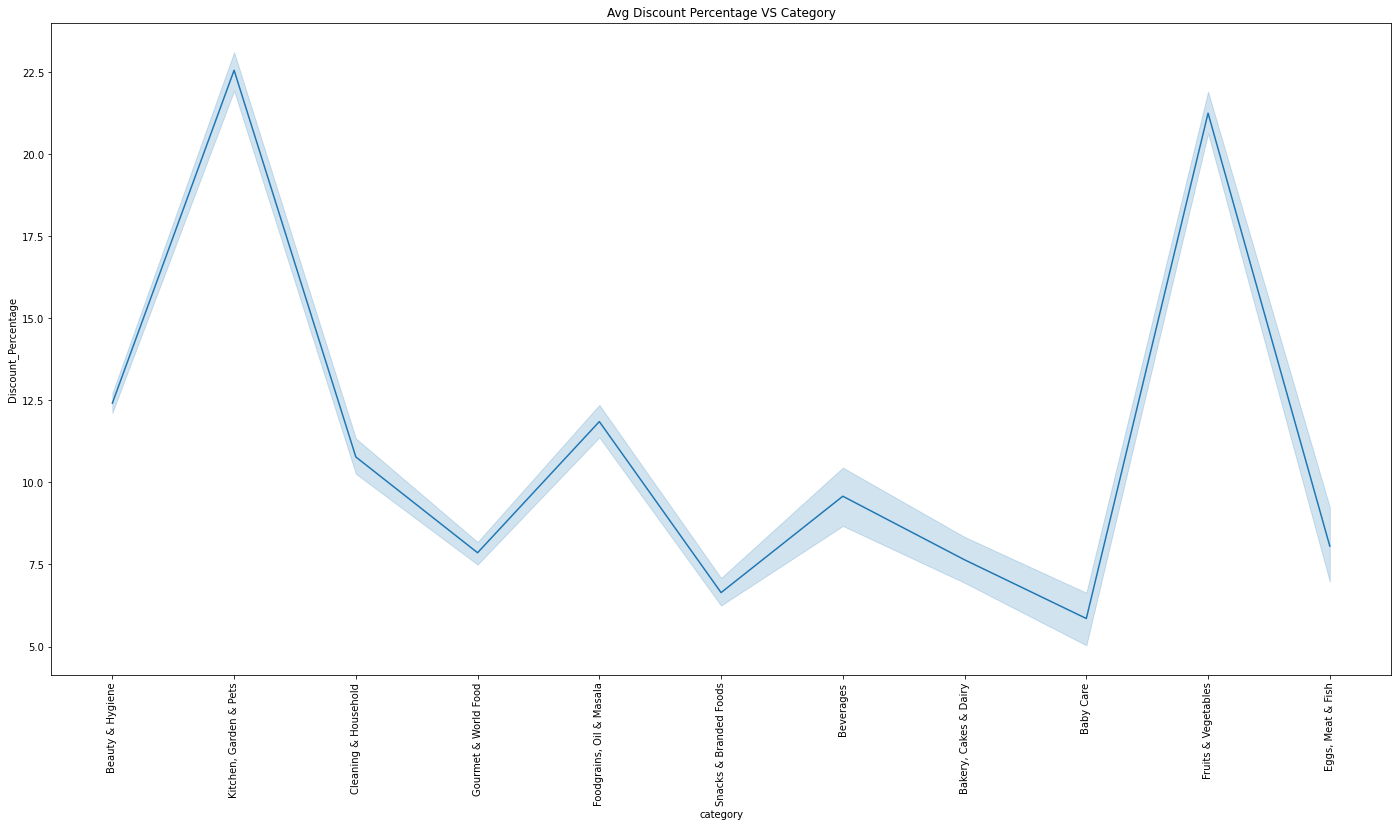

In [37]:
plt.figure(figsize=(24,12))
sns.lineplot(data=discount_data,x='category',y='Discount_Percentage')
plt.xticks(rotation=90)
plt.title("Avg Discount Percentage VS Category")
plt.show()